In [1]:
# using DataFrames
# using CSV
include("PVCR.jl");
include("functions/plotting_base_gd.jl")

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1186
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1186
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(

 0.00 %  @ 0
 0.67 %  @ 175
 1.34 %  @ 350
 2.00 %  @ 525
 2.67 %  @ 700
 3.33 %  @ 875
 4.00 %  @ 1050
 4.67 %  @ 1225
 5.33 %  @ 1400
 6.00 %  @ 1575
 6.66 %  @ 1750
 7.33 %  @ 1925
 7.99 %  @ 2100
 8.66 %  @ 2275
 9.33 %  @ 2450
 9.99 %  @ 2625
10.66 %  @ 2800
11.32 %  @ 2975
11.99 %  @ 3150
12.66 %  @ 3325
13.32 %  @ 3500
13.99 %  @ 3675
14.65 %  @ 3850
15.32 %  @ 4025
15.99 %  @ 4200
16.65 %  @ 4375
17.32 %  @ 4550
17.98 %  @ 4725
18.65 %  @ 4900
19.32 %  @ 5075
19.98 %  @ 5250
20.65 %  @ 5425
21.31 %  @ 5600
21.98 %  @ 5775
22.64 %  @ 5950
23.31 %  @ 6125
23.98 %  @ 6300
24.64 %  @ 6475
25.31 %  @ 6650
25.97 %  @ 6825
26.64 %  @ 7000
27.31 %  @ 7175
27.97 %  @ 7350
28.64 %  @ 7525
29.30 %  @ 7700
29.97 %  @ 7875
30.64 %  @ 8050
31.30 %  @ 8225
31.97 %  @ 8400
32.63 %  @ 8575
33.30 %  @ 8750
 0.00 %  @ 0
 0.67 %  @ 175
 1.34 %  @ 350
 2.00 %  @ 525
 2.67 %  @ 700
 3.33 %  @ 875
 4.00 %  @ 1050
 4.67 %  @ 1225
 5.33 %  @ 1400
 6.00 %  @ 1575
 6.66 %  @ 1750
 7.33 %  @ 1925
 7.99 % 

plot_segmented_tariff_category_with_regression (generic function with 2 methods)

In [2]:
# Read in all of the utility bills for the various utilities and tariff types
base_GD = CSV.read("data/Base_GD.csv")

# Narrow down to {Residential | Commerical Industrial | Medium Voltage} ICE customers

all_ice = filter(row -> (!ismissing(row.EMPRESA) && row.EMPRESA == "ICE"), base_GD)

,ANNO,MES,ENERGIA_GENERADA,ENERGIA_DEPOSITADA,ENERGIA_RETIRADA,IMPORTE_POR_ENERGIA_RETIRADA
,Int64,Int64,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,2018,1,1511.0,774.0,741.0,19992.0
2,2018,2,1343.0,718.0,658.0,18332.0
3,2018,3,1537.0,665.0,753.0,20979.0
4,2018,4,1789.0,898.0,876.0,24405.0
5,2018,5,1623.0,944.0,796.0,22177.0
6,2018,6,1108.0,530.0,543.0,15128.0
7,2018,7,1398.0,632.0,685.0,18337.0
8,2018,8,1265.0,653.0,619.0,17245.0
9,2018,9,1321.0,753.0,648.0,18053.0


┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = compacttype(::Type, ::Int64) at show.jl:39
└ @ DataFrames /Users/arnavgautam/.julia/packages/DataFrames/m9gd9/src/abstractdataframe/show.jl:39


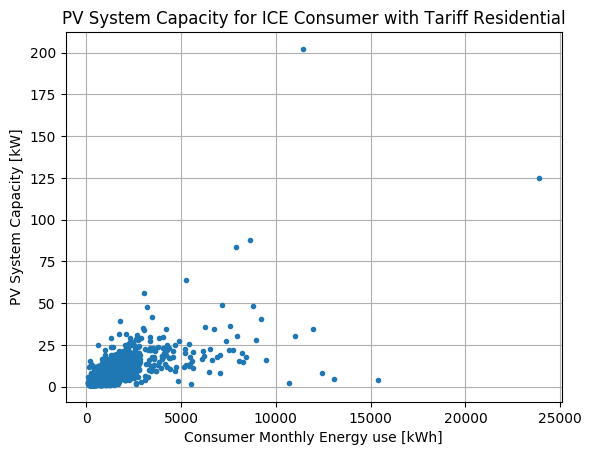

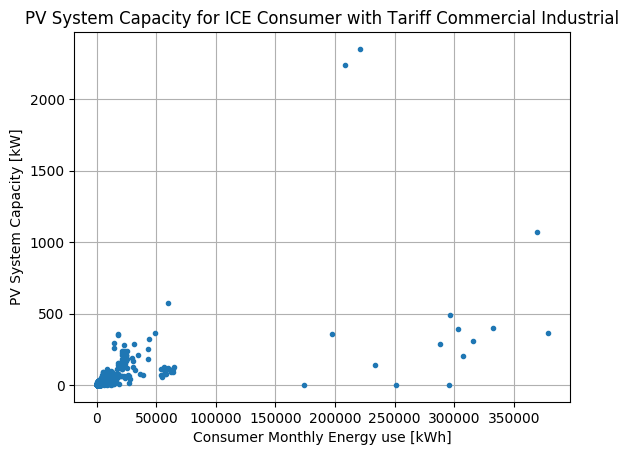

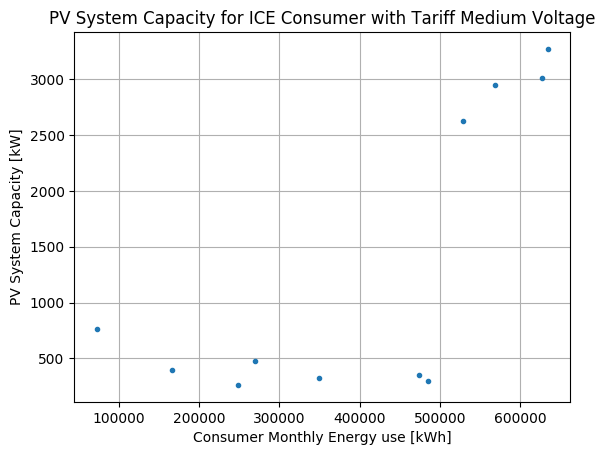

In [4]:
# Plot out what consumers truly install
plot_all_tariffs_per_company(all_ice, "ICE")

In [18]:
# Compare this real-world data with the predicted adoption of the economically rational model in Notebook 4

# Residential
res_consumption = 100:100:3700
res_model_predictions = []
for (ix, co) in enumerate(res_consumption)
    ice_residential.econsumption = co; get_pmax(ice_residential);
    res = optimal_pv(ice_residential, PVRes, 0.0:2:30, BAC1, tariff_increase = true)
    push!(res_model_predictions, res[1][2])
end

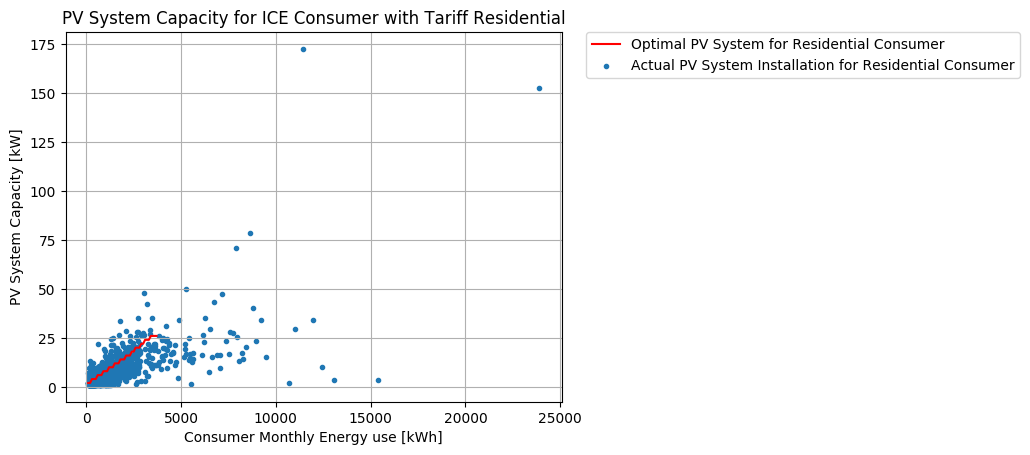

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [22]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, res_model_predictions)

In [9]:
# Commerical Industrial
consumption1 = 100:100:1000
comind_model_predictions = []
for (ix, co) in enumerate(consumption1)
    ice_commercial.econsumption = co; get_pmax(ice_commercial);
    res = optimal_pv(ice_commercial, PVRes, 0.0:10:100, BAC1, tariff_increase = true)
    push!(comind_model_predictions, res[1][2])
end

consumption2 = 2000:1000:10000
for (ix, co) in enumerate(consumption2)
    ice_commercial.econsumption = co; get_pmax(ice_commercial);
    res = optimal_pv(ice_commercial, PVRes, 0.0:10:200, BAC1, tariff_increase = true)
    push!(comind_model_predictions, res[1][2])
end

consumption3 = 20000:10000:100000
for (ix, co) in enumerate(consumption3)
    ice_industrial.econsumption = co; get_pmax(ice_industrial);
    res = optimal_pv(ice_industrial, PVRes, 0.0:20:300, BAC1, tariff_increase = true)
    push!(comind_model_predictions, res[1][2])
end

comind_consumption = vcat(consumption1, consumption2, consumption3);

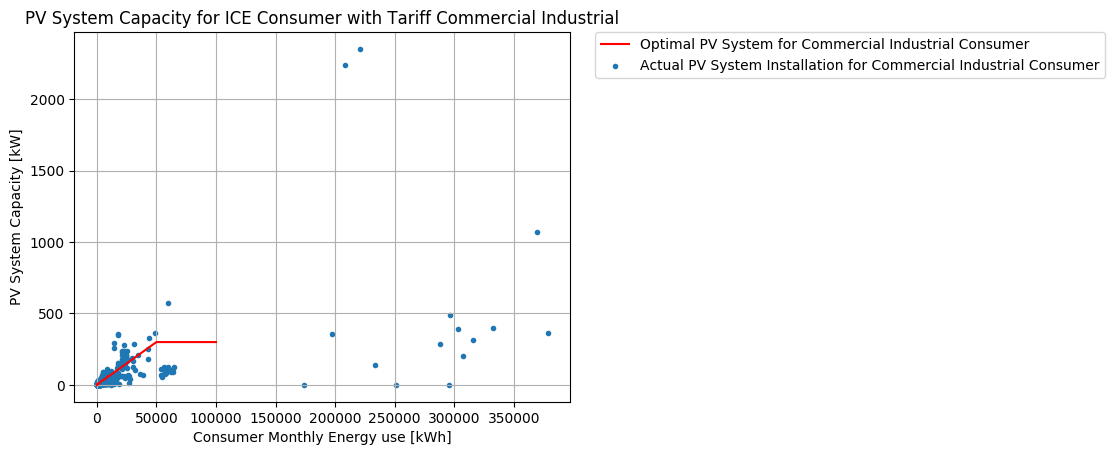

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Commercial Industrial')

In [10]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Commercial Industrial", "ICE", comind_consumption, comind_model_predictions)

In [14]:
# Medium Voltage
consumption1 = 500:500:10000
tmt_model_predictions = []
for (ix, co) in enumerate(consumption1)
    ice_mediumvoltage.econsumption = co; get_pmax(ice_mediumvoltage);
    res = optimal_pv(ice_mediumvoltage, PVRes, 0.0:50:500, BAC1, tariff_increase = true)
    push!(tmt_model_predictions, res[1][2])
end

consumption2 = 10000:10000:200000
for (ix, co) in enumerate(consumption2)
    ice_mediumvoltage.econsumption = co; get_pmax(ice_mediumvoltage);
    res = optimal_pv(ice_mediumvoltage, PVRes, 0.0:50:500, BAC1, tariff_increase = true)
    push!(tmt_model_predictions, res[1][2])
end

consumption3 = 200000:100000:600000
for (ix, co) in enumerate(consumption3)
    ice_mediumvoltage.econsumption = co; get_pmax(ice_mediumvoltage);
    res = optimal_pv(ice_mediumvoltage, PVRes, 0.0:50:500, BAC1, tariff_increase = true)
    push!(tmt_model_predictions, res[1][2])
end

tmt_consumption = vcat(consumption1, consumption2, consumption3);

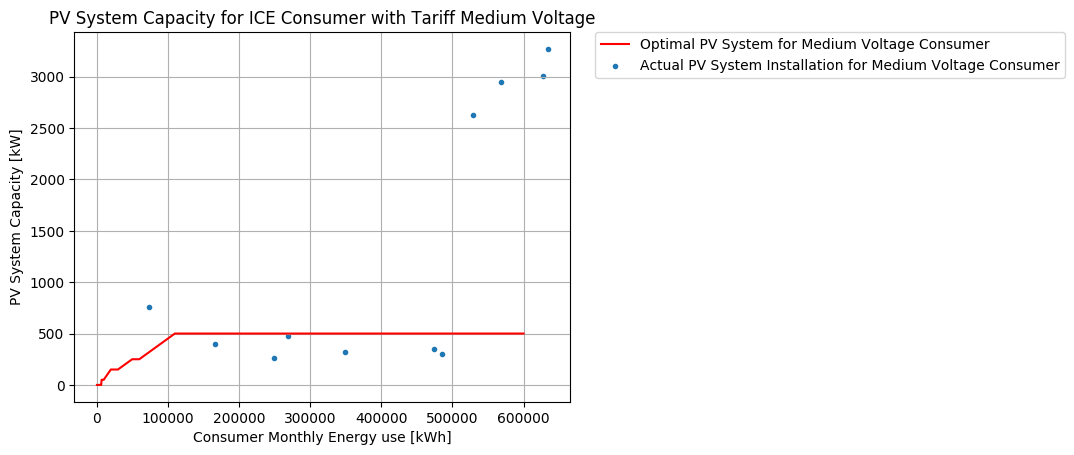

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Medium Voltage')

In [15]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Medium Voltage", "ICE", tmt_consumption, tmt_model_predictions)

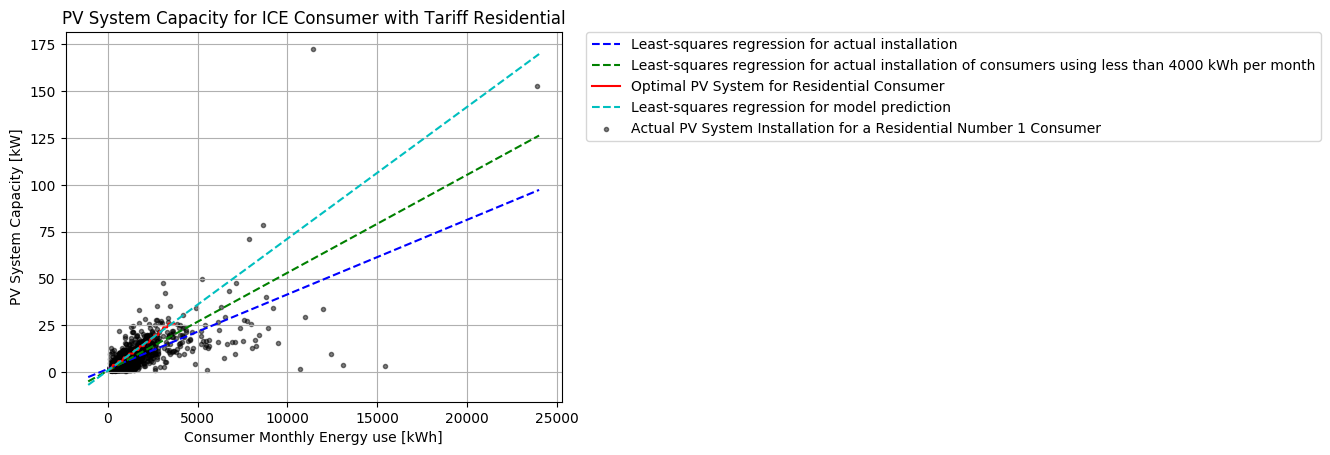

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [23]:
plot_segmented_tariff_category_with_regression(all_ice, "Residential", "ICE", res_consumption, res_model_predictions, 4000)

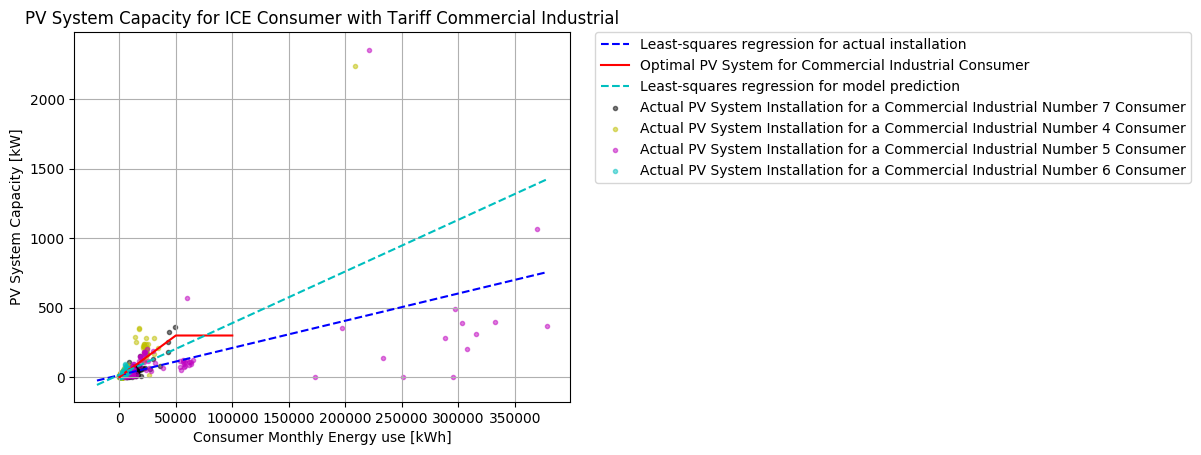

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Commercial Industrial')

In [13]:
plot_segmented_tariff_category_with_regression(all_ice, "Commercial Industrial", "ICE", comind_consumption, comind_model_predictions)

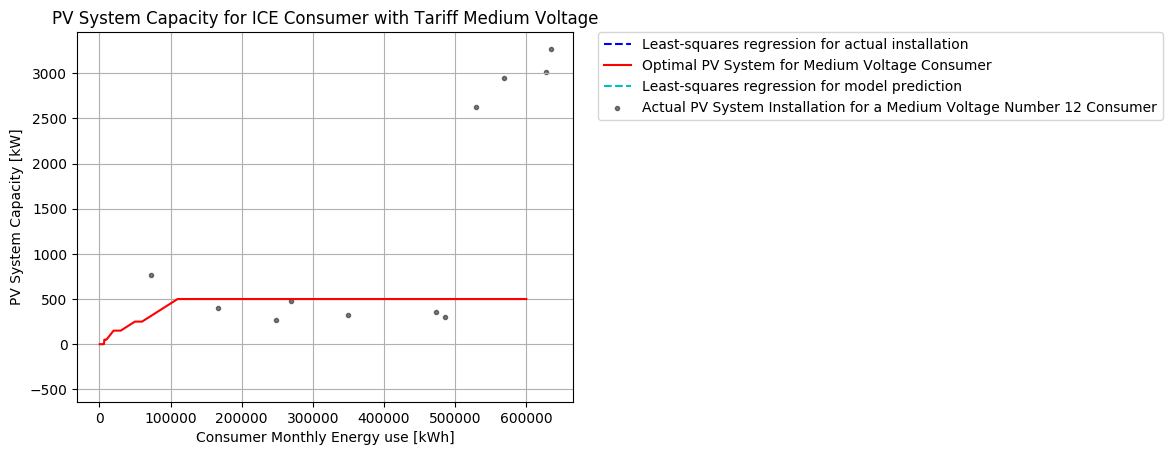

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Medium Voltage')

In [17]:
plot_segmented_tariff_category_with_regression(all_ice, "Medium Voltage", "ICE", tmt_consumption, tmt_model_predictions)